## DataFrame 생성

In [1]:
# DataFrame은 2차원 형태의 자료구조
# 각 날짜별로 [시가, 고가, 저가, 종가 등]의 정보 == 2차원

In [2]:
from pandas import DataFrame

In [3]:
raw_data = {'col0': [1, 2, 3, 4],
           'col1': [10, 20, 30, 40],
           'col2': [100, 200, 300, 400]}

data = DataFrame(raw_data)
data

,col0,col1,col2
0,1,10,100
1,2,20,200
2,3,30,300
3,4,40,400


In [4]:
data['col0']

0    1
1    2
2    3
3    4
Name: col0, dtype: int64

In [10]:
data['col1']

0    10
1    20
2    30
3    40
Name: col1, dtype: int64

In [6]:
# 각 칼럼은 Series 객체
# 즉 DataFrame은 여러 Series 객체로 구성된 자료구조
type(data['col1'])

pandas.core.series.Series

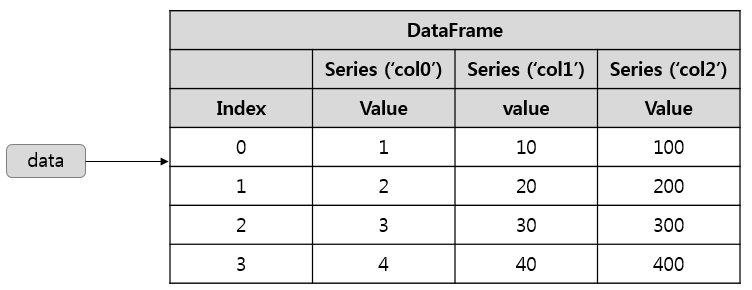

그림 13.10 DataFrame 객체의 내부 구조

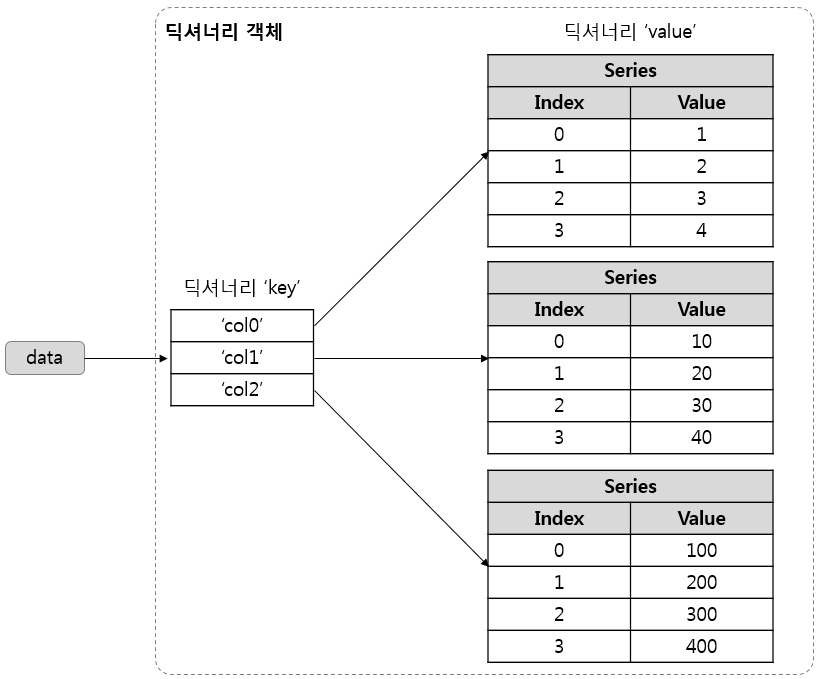

그림 13.11 DataFrame 객체의 구조(2)  
: 딕셔너리처럼 key를 기준으로 각각의 Series에 접근

In [7]:
# 일정 기간의 시가, 고가, 저가, 종가를 DataFrame으로 저장
daeshin = {'open':  [11650, 11100, 11200, 11100, 11000],
           'high':  [12100, 11800, 11200, 11100, 11150],
           'low' :  [11600, 11050, 10900, 10950, 10900],
           'close': [11900, 11600, 11000, 11100, 11050]}

daeshin_day = DataFrame(daeshin)
print(daeshin_day)

    open   high    low  close
0  11650  12100  11600  11900
1  11100  11800  11050  11600
2  11200  11200  10900  11000
3  11100  11100  10950  11100
4  11000  11150  10900  11050


In [8]:
# 칼럼 순서 바꾸기 <- columns 키워드
daeshin_day = DataFrame(daeshin, columns=['open', 'close', 'high', 'low'])
daeshin_day

,open,close,high,low
0,11650,11900,12100,11600
1,11100,11600,11800,11050
2,11200,11000,11200,10900
3,11100,11100,11100,10950
4,11000,11050,11150,10900


In [9]:
# 인덱스를 설정해주기
date = ['16.02.29', '16.02.26', '16.02.25', '16.02.24', '16.02.23']
daeshin_day = DataFrame(daeshin, 
                        columns=['open', 'high', 'low', 'close'], 
                        index=date)
daeshin_day

,open,high,low,close
16.02.29,11650,12100,11600,11900
16.02.26,11100,11800,11050,11600
16.02.25,11200,11200,10900,11000
16.02.24,11100,11100,10950,11100
16.02.23,11000,11150,10900,11050


## DataFrame 칼럼, 로우 선택

In [11]:
# 종가를 기준으로만 데이터 분석
close = daeshin_day['close']
close

16.02.29    11900
16.02.26    11600
16.02.25    11000
16.02.24    11100
16.02.23    11050
Name: close, dtype: int64

In [21]:
# 그냥 인덱스로 접근하는 건 에러 (키로 인식하기 때문)
daeshin_day['16.02.24']

KeyError: '16.02.24'

In [19]:
# 로우에 접근하려면 loc 메서드 사용해 인덱스 넘겨주기
day_data = daeshin_day.loc['16.02.24']
day_data

open     11100
high     11100
low      10950
close    11100
Name: 16.02.24, dtype: int64

In [20]:
# DataFrame의 칼럼과 인덱스는
# 각각 columns와 index 속성을 사용하면 됨
print(daeshin_day.columns)
print(daeshin_day.index)

Index(['open', 'high', 'low', 'close'], dtype='object')
Index(['16.02.29', '16.02.26', '16.02.25', '16.02.24', '16.02.23'], dtype='object')
